In [ ]:
#2.6 fancy indexing and index tricks
#2018-4-3

In [ ]:
#2.5 less basic
#广播的第一条规则是，如果所有输入数组的维数都不相同，
# 那么在所有数组具有相同的维数之前，
# 会将“1”重复添加到较小数组的形状中。

#广播的第二条规则确保沿着特定维度的大小为1的数组的
# 行为就好像它们具有沿着该维度的最大形状的数组的大小。
#  假设数组元素的值在“广播”数组的维度上是相同的

In [24]:
#2.6.1 indexing with arrays of indices
#numpy 不仅支持Python通过整数和切片进行索引，
# 还支持整数数组和布尔数组进行索引
import numpy as np
#（1）原数组是一维数组
a = np.arange(12)**2
print("a平方: \n",a)
i = np.array([1,1,3,8,5])
print("i: \n",i)
#一维数组作为下标索引
b = a[i] #通过数组i进行索引,以数组i中的元素作为下标，返回a中对应位置的元素
print("一维数组i索引:\n",b)
#(2)二维数组作为下标索引
j = np.array([[3,4],[9,7]])
print("j:\n",j)
c = a[j]
print("二维数组j索引:\n",c)

#原数组是多维数组情况下，使用数组作为下标索引
palette = np.array([[0,0,0],
                    [255,0,0],
                    [0,255,0],
                    [0,0,255],
                    [255,255,255]])
image1 = np.array([4,1,2,0])
image2 = np.array([[0,1,2,0],
                  [0,3,4,0]])
#image中的元素索引对应的原数组的某一维的数组
b = palette[image1]
print("image1 :\n",b)
c = palette[image2]
print("image2 :\n",c)

#索引不在是一个数组，而是两个数组进行索引，如a[i,j]
#此时i，j的shape必须一致
a = np.arange(12).reshape(3,4)
print("a :\n",a)
i = np.array([[0,1],
              [2,1]])
j = np.array([[2,1],
              [3,3]])
b = a[i,j]
print("两个下标数组索引：\n",b)
c = a[i,2]
print("c :\n",c)
d = a[:,j]
print("d :\n",d)

#将i，j放入一个列表中，然后作为下标进行索引
l = [i,j]
b = a[l]
print("list :\n",b)
#但是不能讲i，j放入array中来进行索引，如果放入array后，需要用tuple转为元组
s = np.array([i,j])
#b = a[s] #这是错误的，不能这样使用
c = a[tuple(s)] #正确，如果这么使用，必须tuple转换，等同于a[i,j]
print("c ;\n",c)



a平方: 
 [  0   1   4   9  16  25  36  49  64  81 100 121]
i: 
 [1 1 3 8 5]
一维数组i索引:
 [ 1  1  9 64 25]
j:
 [[3 4]
 [9 7]]
二维数组j索引:
 [[ 9 16]
 [81 49]]
image1 :
 [[255 255 255]
 [255   0   0]
 [  0 255   0]
 [  0   0   0]]
image2 :
 [[[  0   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0 255]
  [255 255 255]
  [  0   0   0]]]
a :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
两个下标数组索引：
 [[ 2  5]
 [11  7]]
c :
 [[ 2  6]
 [10  6]]
d :
 [[[ 2  1]
  [ 3  3]]

 [[ 6  5]
  [ 7  7]]

 [[10  9]
  [11 11]]]
list :
 [[ 2  5]
 [11  7]]
c ;
 [[ 2  5]
 [11  7]]


In [20]:
#另一个数组索引用法是搜索最大值
import numpy as np
time =  np.linspace(20,145,5)
data = np.sin(np.arange(20)).reshape(5,4)
print("time :\n",time)
print("data :\n",data)

#返回每一列的最大值得索引
ind = data.argmax(axis=0)
print("每列最大值得索引，ind :\n",ind)
time_max = time[ind]
print("time_max:\n",time_max) #利用上面最大值的索引作为下标数组搜索

#等同于data[ind[0],0],data[ind[1],1],...
data_max = data[ind,range(data.shape[1])]
print("data_max:\n",data_max)

x = np.all(data_max == data.max(axis=0))
print("x :",x)

time :
 [ 20.    51.25  82.5  113.75 145.  ]
data :
 [[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]
每列最大值得索引，ind :
 [2 0 3 1]
time_max:
 [ 82.5   20.   113.75  51.25]
data_max:
 [0.98935825 0.84147098 0.99060736 0.6569866 ]
x : True


In [25]:
#使用数组下标进行赋值
import numpy as np
a = np.arange(5)
print("a :\n",a)
a[[1,3,4]] = 999
print("modified a :\n",a)

print("----------------")
#当列表中包含重复的时候，赋值会重复几次，最后一次的值生效
a = np.arange(5)
print("before a :\n",a)
a[[0,0,2]] = [22,33,55]
print("modified a :\n",a)

print("------------------")
#当时用"+="时候，遇到重复的只会计算第一次的，不会重复计算
a = np.arange(5)
print("a :\n",a)
a[[0,0,2]] += 1
print("+= a :\n",a)

a :
 [0 1 2 3 4]
modified a :
 [  0 999   2 999 999]
----------------
before a :
 [0 1 2 3 4]
modified a :
 [33  1 55  3  4]
------------------
a :
 [0 1 2 3 4]
+= a :
 [1 1 3 3 4]


In [27]:
#2.6.2 indexing with boolean arrays
import numpy as np 
#使用布尔数组进行索引
#使用布尔数组进行索引，当数组位置上是true时候代表需要，false时候表示不需要
a = np.arange(12).reshape(3,4)
print("origin a :\n",a)
b = a > 4
print("b :\b",b)
c = a[b]
print("boolean index, c :\n",c)
a[b] = 0 #使用布尔数组作为下标赋值时候，只对true位置的元素进行赋值
print("boolean index 赋值 :\n",a)

origin a :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b : [[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
boolean index, c :
 [ 5  6  7  8  9 10 11]
boolean index 赋值 :
 [[0 1 2 3]
 [4 0 0 0]
 [0 0 0 0]]


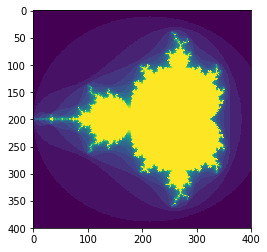

In [30]:
#利用boolean array作为下标索引产生一个图像，利用matplotlib
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2 # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i # note when
        z[diverge] = 2 # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()



In [42]:
#布尔第二种索引方法
a = np.arange(12).reshape(3,4)
print("a:\n",a)
#选择对应b1元素是true的某一维
b1 = np.array([False,True,True]) # first dim selection
#b2 = np.array([True,False,True,False]) # second dim selection
b2 = np.array([True,True,False,False])
print("(1):\n",a[b1,:]) # selecting rows

print("(2):\n",a[b1]) # same thing
print("(3):\n",a[:,b2]) # selecting columns
print("(4):\n",a[b1,b2]) # a weird thing to do



a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(1):
 [[ 4  5  6  7]
 [ 8  9 10 11]]
(2):
 [[ 4  5  6  7]
 [ 8  9 10 11]]
(3):
 [[0 1]
 [4 5]
 [8 9]]
(4):
 [4 9]


In [31]:
import numpy as np

# 起始:终止:间隔 （不包括终止）
print(np.mgrid[-1:10:5])
print(np.mgrid[-1:9:5])
# 起始:终止:这个维度上点的个数j （包括终止）
print(np.mgrid[-1:1:5j])
print(np.mgrid[-1:1:6j])
# 高维网格，默认间隔为1
print(np.mgrid[0:5,0:5])

[-1  4  9]
[-1  4]
[-1.  -0.5  0.   0.5  1. ]
[-1.  -0.6 -0.2  0.2  0.6  1. ]
[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]
  [3 3 3 3 3]
  [4 4 4 4 4]]

 [[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]


In [32]:
import numpy as np
print(np.ogrid[0:5,0:5])
print(np.mgrid[0:5,0:5])


[array([[0],
       [1],
       [2],
       [3],
       [4]]), array([[0, 1, 2, 3, 4]])]
[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]
  [3 3 3 3 3]
  [4 4 4 4 4]]

 [[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]


In [36]:
#ix_函数可以用来组合不同的向量，以获得每个n-uplet的结果
import numpy as np
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
print("ax:\n",ax)
print("bx :\n",bx)
print("cx :\n",cx)

ax:
 [[[2]]

 [[3]]

 [[4]]

 [[5]]]
bx :
 [[[8]
  [5]
  [4]]]
cx :
 [[[5 4 6 8 3]]]
